links to rmember :


    datasets:
      https://sites.google.com/eng.ucsd.edu/ucsdbookgraph/home?authuser=0
      
      
      https://www.kaggle.com/datasets/bahramjannesarr/goodreads-book-datasets-10m/discussion?select=book300k-400k.csv    kaggle version can give some ideas on useful features
      
      
    meetings reports: 
      https://docs.google.com/document/d/1u1gj-lFCBMWq5EHUAQfJXjPPUHh2Wusp713xlhQhuPc/edit#heading=h.khrl74ii4si
    
    also check these resources:
      https://github.com/SoroushGhaderi/goodreads_book_dataset  how to read from goodread API
      
      

Goals:

    To create a personalized book recommendation system that suggests books based on a user's reading history, ratings, and reviews.
    To improve user engagement and retention on a book platform by providing users with relevant book recommendations.
    To increase book sales and revenue for publishers and authors by promoting their books to potential readers.

Problem Statement:

Develop a book recommendation system using the Goodreads dataset to provide personalized book recommendations to users. The system should be able to recommend books based on a user's reading history, ratings, and reviews, as well as other factors such as genre, author, and publication date. The ultimate goal is to create a user-friendly and effective recommender system that enhances the user's reading experience and helps them discover new books that match their preferences.

Sample usages of the book recommendation system could include:

    A web or mobile app that recommends books to users based on their reading history, ratings, and reviews.
    A book platform that recommends books to users based on their preferences and interests, increasing user engagement and retention.
    A publisher or author platform that recommends books to readers based on their preferences and interests, increasing book sales and revenue.
    A book club platform that recommends books to members based on their preferences and interests, improving the book club experience and fostering community engagement.
    A bookstore or library platform that recommends books to customers based on their preferences and interests, improving the customer experience and increasing sales.

In [1]:
import json
import pandas as pd
import gzip

### lets directly read from gzip

In [6]:
#filename='goodreads_books.json.gz'
filename='goodreads_books_young_adult.json.gz'
with gzip.open(filename,'r') as f:        
    line = f.readline()
    
data = json.loads(line)    
data

{'isbn': '',
 'text_reviews_count': '1',
 'series': ['147734'],
 'country_code': 'US',
 'language_code': '',
 'popular_shelves': [{'count': '1057', 'name': 'to-read'},
  {'count': '101', 'name': 'young-adult'},
  {'count': '59', 'name': 'ya'},
  {'count': '58', 'name': 'paranormal'},
  {'count': '55', 'name': 'fantasy'},
  {'count': '36', 'name': 'favorites'},
  {'count': '35', 'name': 'romance'},
  {'count': '26', 'name': 'urban-fantasy'},
  {'count': '25', 'name': 'books-i-own'},
  {'count': '25', 'name': 'supernatural'},
  {'count': '19', 'name': 'fiction'},
  {'count': '18', 'name': 'owned'},
  {'count': '18', 'name': 'currently-reading'},
  {'count': '16', 'name': 'paranormal-romance'},
  {'count': '16', 'name': 'l-j-smith'},
  {'count': '14', 'name': 'lj-smith'},
  {'count': '14', 'name': 'series'},
  {'count': '13', 'name': 'dark-visions'},
  {'count': '11', 'name': 'teen'},
  {'count': '9', 'name': 'vampires'},
  {'count': '8', 'name': 'ebooks'},
  {'count': '7', 'name': 'read-

In [7]:
def get_author(data):
    for i in range(len(data['authors'])):
        author = data['authors'][i]['author_id']
        return author

def get_genre(data):
    genres = []
    for i in range(len(data['popular_shelves'])):
        genre = list(data['popular_shelves'][i].values())[1]
        genres.append(genre)
    return genres

get_author(data),get_genre(data)



('50873',
 ['to-read',
  'young-adult',
  'ya',
  'paranormal',
  'fantasy',
  'favorites',
  'romance',
  'urban-fantasy',
  'books-i-own',
  'supernatural',
  'fiction',
  'owned',
  'currently-reading',
  'paranormal-romance',
  'l-j-smith',
  'lj-smith',
  'series',
  'dark-visions',
  'teen',
  'vampires',
  'ebooks',
  'read-in-2012',
  'kindle',
  'l-j--smith',
  'love-triangle',
  'magic',
  'my-books',
  'psychics',
  'i-own',
  'ebook',
  'horror',
  'read-in-2015',
  'ya-paranormal',
  'owned-books',
  'science-fiction',
  'teen-romance',
  'psychic',
  'library',
  'own-it',
  'to-buy',
  'series-finished',
  'read-in-2013',
  'books-i-have',
  're-read',
  'teen-fiction',
  'have',
  'my-library',
  'trilogy',
  're-reads',
  'reviewed',
  'other-supernatural',
  'high-school',
  'smith-lj',
  'trilogies',
  'favourites',
  'sci-fi',
  'witches',
  'adult',
  'read-in-2009',
  'sci-fi-fantasy',
  'young-adult-fiction',
  'childhood-favorites',
  'read-in-2016',
  'read-201

In [8]:
def parse_fields(data):
    return {
        "book_id": data["book_id"],
        "isbn" : data['isbn'],
        "author_id" : get_author(data),
        "publisher" : data['publisher'],
        "title": data["title_without_series"],
        "genres": get_genre(data),
        "description" :data['description'],
        "avg_rating" : data['average_rating'],
        "ratings_count": data["ratings_count"],
        "num_pages" : data['num_pages'],
        "pub_year" : data['publication_year'],
        'language_code' : data['language_code'],
        "similar_books" : data['similar_books'],
#        "url": data["url"], 
        "cover_image": data["image_url"]}
parse_fields(data)

{'book_id': '12182387',
 'isbn': '',
 'author_id': '50873',
 'publisher': '',
 'title': 'The Passion (Dark Visions, #3)',
 'genres': ['to-read',
  'young-adult',
  'ya',
  'paranormal',
  'fantasy',
  'favorites',
  'romance',
  'urban-fantasy',
  'books-i-own',
  'supernatural',
  'fiction',
  'owned',
  'currently-reading',
  'paranormal-romance',
  'l-j-smith',
  'lj-smith',
  'series',
  'dark-visions',
  'teen',
  'vampires',
  'ebooks',
  'read-in-2012',
  'kindle',
  'l-j--smith',
  'love-triangle',
  'magic',
  'my-books',
  'psychics',
  'i-own',
  'ebook',
  'horror',
  'read-in-2015',
  'ya-paranormal',
  'owned-books',
  'science-fiction',
  'teen-romance',
  'psychic',
  'library',
  'own-it',
  'to-buy',
  'series-finished',
  'read-in-2013',
  'books-i-have',
  're-read',
  'teen-fiction',
  'have',
  'my-library',
  'trilogy',
  're-reads',
  'reviewed',
  'other-supernatural',
  'high-school',
  'smith-lj',
  'trilogies',
  'favourites',
  'sci-fi',
  'witches',
  'adu

In [14]:
%%time
books_titles = []

with gzip.open(filename,'r') as f:
    while True:
        line = f.readline()
        if not line:
            break
        data = json.loads(line)    
        fields = parse_fields(data)
        try:
            ratings = int(fields["ratings_count"])
        except ValueError:
            continue
        if ratings > 7:
            books_titles.append(fields)
            
books = pd.DataFrame.from_dict(books_titles)
books.head()

CPU times: user 16.5 s, sys: 728 ms, total: 17.3 s
Wall time: 18.9 s


,book_id,isbn,author_id,publisher,title,genres,description,avg_rating,ratings_count,num_pages,pub_year,language_code,similar_books,cover_image
0,21401181,0698143760,7314532,Viking Children's,"Half Bad (Half Life, #1)","[fantasy, young-adult, ya, favorites, books-i-...",Wanted by no one.\nHunted by everyone.\nSixtee...,3.80,33,416,2014,,"[15728807, 17182499, 15673520, 16081758, 17842...",https://images.gr-assets.com/books/1394747643m...
1,10099492,,293603,,Twelfth Grade Kills (The Chronicles of Vladimi...,"[to-read, vampires, currently-reading, young-a...",It all comes down to this.\nVlad's running out...,4.35,152,,,eng,"[25861113, 7430195, 18765937, 6120544, 3247550...",https://s.gr-assets.com/assets/nophoto/book/11...
2,22642971,0990662616,4018722,Scripturient Books,The Body Electric,"[to-read, young-adult, sci-fi, science-fiction...",The future world is at peace.\nElla Shepherd h...,3.71,1525,351,2014,eng,"[20499652, 17934493, 13518102, 16210411, 17149...",https://images.gr-assets.com/books/1406979059m...
3,31556136,0062373374,6537142,Balzer + Bray,Like Water,"[to-read, young-adult, contemporary, 2017-rele...",A gorgeously written and deeply felt literary ...,3.89,109,304,2017,,[],https://images.gr-assets.com/books/1503003866m...
4,8030991,9512310201,2760047,Karisto,"Katso eteesi, Lotta!","[to-read, childhood, read-in-2002, children-or...",Loin tusaisen katseen pimeyteen.\n- Pidetaan t...,3.53,34,139,1976,fin,[],https://images.gr-assets.com/books/1295309151m...


In [15]:
books['avg_rating'] = books['avg_rating'].astype(float)
books['language_code'] = books['language_code'].astype('category')
books['ratings_count'] = books['ratings_count'].astype(int)
books['num_pages'] = books['num_pages'].replace('', 0).astype(int)
books.shape

(80426, 14)

80426
CPU times: user 49.2 ms, sys: 5.23 ms, total: 54.5 ms
Wall time: 53.8 ms


8     1560
9     1544
10    1372
11    1309
12    1300
13    1269
15    1174
14    1159
16    1127
18    1102
17    1033
20     991
19     983
21     907
22     898
23     867
25     860
27     809
24     803
26     764
29     758
28     742
30     740
31     666
32     636
33     636
35     623
37     566
38     562
39     558
34     549
36     547
44     519
41     515
42     515
40     513
46     480
45     476
43     462
47     433
Name: ratings_count, dtype: int64

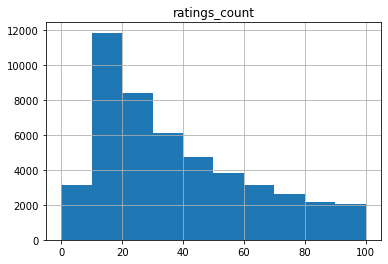

In [21]:
%%time
print(len(books))
books.hist(column='ratings_count', range=[0, 100])
ratecnt=books.ratings_count.value_counts()
ratecnt.head(40)

In [24]:
books.duplicated(subset=['title','author_id']).value_counts()

False    52167
True     28259
dtype: int64

8min 29s ± 2min 59s per loop (mean ± std. dev. of 7 runs, 1 loop each)


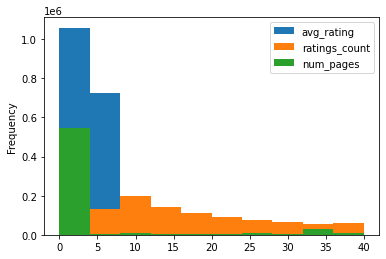

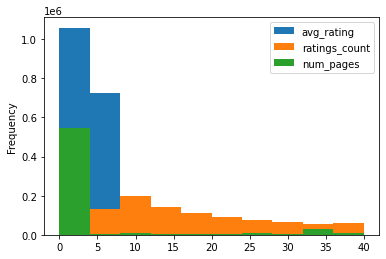

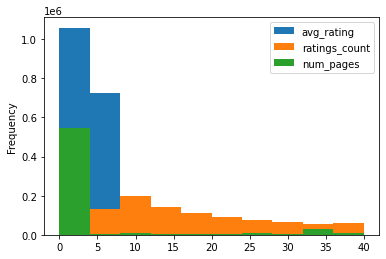

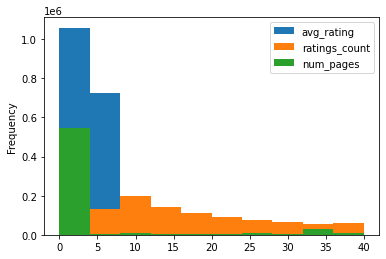

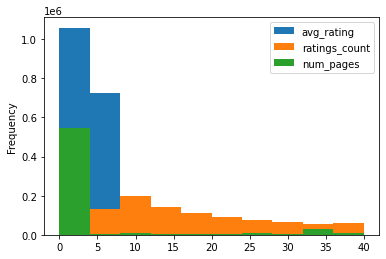

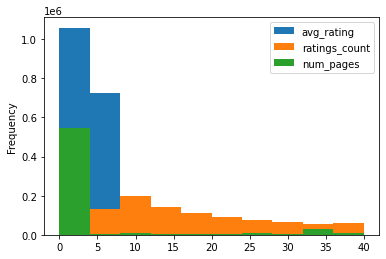

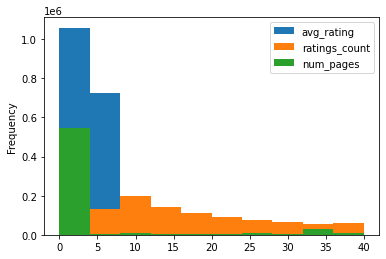

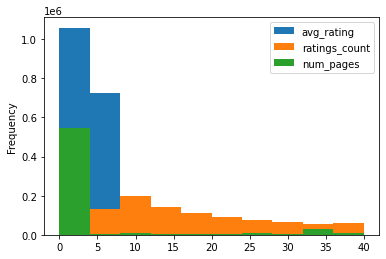

In [26]:
%%time
books.plot.hist('ratings_count', range=[0, 40])